<a href="https://colab.research.google.com/github/vineelabaisa9119/spamSMS_classifier/blob/main/spamSMSClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#importing the libs
import pandas as pd

df=pd.read_csv('/content/SMSSpamCollection',sep='\t',header=None,names=['label','message'])

In [4]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.shape

(5572, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


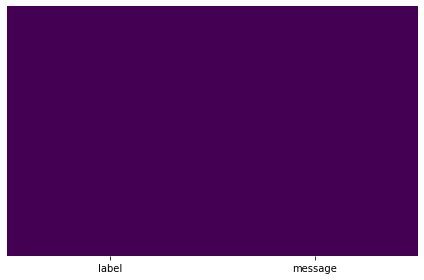

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
def get_heatmap(df):
    #This function gives heatmap of all NaN values
    plt.figure(figsize=(6,4))
    sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
    plt.tight_layout()
    return plt.show()

get_heatmap(df)

In [8]:
#Data preprocessing
#method 1 already done in other datasets
#method 2
df['label']=df.label.map({'ham':0,'spam':1})

In [9]:
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
from numpy.ma.core import count
#Bag of  words (BOW)
documents=['Hello, how are you!',
           'Win money, Win from home.'
           'Call me now.']

#applying 
from sklearn.feature_extraction.text import CountVectorizer
count_vector=CountVectorizer()
print(count_vector)

CountVectorizer()


In [11]:
count_vector.fit(documents)

CountVectorizer()

In [12]:
n=count_vector.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [13]:
print(n)

['are', 'call', 'from', 'hello', 'home', 'how', 'me', 'money', 'now', 'win', 'you']


In [14]:
doc_array=count_vector.transform(documents).toarray()

In [15]:
doc_array

array([[1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1],
       [0, 1, 1, 0, 1, 0, 1, 1, 1, 2, 0]])

In [16]:
freq_table = pd.DataFrame(data=doc_array,columns=n)

In [17]:
freq_table

,are,call,from,hello,home,how,me,money,now,win,you
0,1,0,0,1,0,1,0,0,0,0,1
1,0,1,1,0,1,0,1,1,1,2,0


In [18]:
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
#loading the data
X = df.iloc[:,-1:].values #independent message column
Y = df.iloc[:,:-1].values  #dependent label column
'''
#METHOID 2  
X=np.array(df['meaasge])
Y=np.array(df['label'])
#method 3
X=df[['message']]
Y=df[['label']]'''

"\n#METHOID 2  \nX=np.array(df['meaasge])\nY=np.array(df['label'])\n#method 3\nX=df[['message']]\nY=df[['label']]"

In [20]:
X

array([['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'],
       ['Ok lar... Joking wif u oni...'],
       ["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"],
       ...,
       ['Pity, * was in mood for that. So...any other suggestions?'],
       ["The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free"],
       ['Rofl. Its true to its name']], dtype=object)

In [21]:
Y

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [22]:
#splits the data 
#X

In [23]:
#splitting the dataset
#spliting he data set into train and test dataset
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=3)

In [24]:
X_train

array([["Don know. I did't msg him recently."],
       ['Do you know why god created gap between your fingers..? So that, One who is made for you comes &amp; fills those gaps by holding your hand with LOVE..!'],
       ['Thnx dude. u guys out 2nite?'],
       ...,
       ['Guess who spent all last night phasing in and out of the fourth dimension'],
       ['Eh sorry leh... I din c ur msg. Not sad already lar. Me watching tv now. U still in office?'],
       ['Free Top ringtone -sub to weekly ringtone-get 1st week free-send SUBPOLY to 81618-?3 per week-stop sms-08718727870']],
      dtype=object)

In [25]:
X_test

array([['URGENT! Your mobile No 077xxx WON a £2,000 Bonus Caller Prize on 02/06/03! This is the 2nd attempt to reach YOU! Call 09066362206 ASAP! BOX97N7QP, 150ppm'],
       ['Ok i will tell her to stay out. Yeah its been tough but we are optimistic things will improve this month.'],
       ['Congrats! 2 mobile 3G Videophones R yours. call 09063458130 now! videochat wid your mates, play java games, Dload polyPH music, noline rentl.'],
       ...,
       ['I don wake since. I checked that stuff and saw that its true no available spaces. Pls call the embassy or send a mail to them.'],
       ['Lol I know! Hey someone did a great inpersonation of flea on the forums. I love it!'],
       ['K do I need a login or anything']], dtype=object)

In [26]:
X_train.shape

(4457, 1)

In [27]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
count_vector=CountVectorizer()
#transfrom the training into data freq vectors and return matrix
training_data=count_vector.fit_transform(X_train.flatten())

#transfrom the testing into data freq vectors and return matrix
testing_data=count_vector.transform(X_test.flatten())


In [28]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(training_data,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

In [29]:
Y_test=Y_test.flatten()
Y_train=Y_train.flatten()

In [33]:
y_pred=model.predict(training_data)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),Y_train.reshape(len(Y_train),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [1 1]]


In [34]:
len(y_pred)

4457

In [35]:
len(Y_test)

1115

In [32]:
print("Predicted value for training data:",model.score(training_data,Y_train))
print("Training accuracy:",model.score(training_data,Y_train)*100)

Predicted value for training data: 0.9928202827013687
Training accuracy: 99.28202827013686


In [31]:
print("Predicted value for testing data:",model.score(testing_data,Y_test))
print("Testing accuracy:",model.score(testing_data,Y_test)*100)

Predicted value for testing data: 0.9901345291479821
Testing accuracy: 99.01345291479821


In [30]:
from sklearn.tree import DecisionTreeClassifier
modeldt=DecisionTreeClassifier()
modeldt.fit(training_data,Y_train)

DecisionTreeClassifier()